## **Análisis y Predicción de Precios de Autos (Core)**

### **Objetivo:**
Aplicar técnicas de regresión lineal, KNN y árboles de decisión para predecir precios de autos utilizando un dataset de Kaggle.

Realizar un Análisis Exploratorio de Datos (EDA) completo y comparar el rendimiento de los modelos mediante benchmarking.


### **Descripción del Dataset:**
Este conjunto de datos contiene información detallada sobre diferentes modelos de autos, incluyendo características técnicas y precios.

El objetivo es predecir el precio de los autos basándose en sus características.

### **Instrucciones:**

### **Parte 1:** Análisis Exploratorio de Datos

1. ***Carga y Exploración de Datos:***

    - Cargar el dataset y revisar la estructura básica.

    - Descripción de las variables y su distribución.

    - Detección y tratamiento de valores nulos.

    - Identificación y tratamiento de outliers.

    - Análisis de correlación entre variables.

### **Parte 2:** Preparación de Datos

2. ***Preprocesamiento:***

    - Selección de características importantes.

    - Transformación de variables categóricas.

    - División del conjunto de datos en entrenamiento y prueba.

    - Escalado de características.

### **Parte 3:** Modelos de Regresión


3. ***Regresión Lineal:***

    - Entrenamiento del modelo.

    - Evaluación del rendimiento (MSE y R²).



4. ***K-Nearest Neighbors (KNN):***

    - Entrenamiento del modelo.

    - Evaluación del rendimiento (MSE y R²).


5. ***Árbol de Decisión:***

    - Entrenamiento del modelo.

    - Evaluación del rendimiento (MSE y R²).


### **Parte 4:** Benchmarking y Comparación de Modelos

6. ***Comparación de Modelos:***

    - Comparar los resultados de los tres modelos en términos de MSE y R².

    - Discusión sobre las diferencias en el rendimiento de los modelos.

### **Conclusión**

7. ***Interpretación de Resultados:***

    - Analizar cuál de los modelos es más adecuado para el problema de predicción de precios de autos.

    - Discutir posibles mejoras y próximos pasos, como el ajuste de hiperparámetros o el uso de técnicas avanzadas.
    

---

### **Tareas Adicionales y Desafíos**

8. ***Desafíos Adicionales:***

- *Optimización de Modelos:* Usar GridSearchCV para optimizar los hiperparámetros de KNN y el Árbol de Decisión.

- *Feature Engineering:* Crear nuevas características basadas en las existentes para mejorar el rendimiento del modelo.

- *Validación Cruzada:* Implementar validación cruzada para evaluar la estabilidad de los modelos.


### **Parte 1: Análisis Exploratorio de Datos**

Primeras 10 filas del DataFrame:

   symboling normalized-losses         make fuel-type aspiration num-of-doors  \
0          3                 ?  alfa-romero       gas        std          two   
1          3                 ?  alfa-romero       gas        std          two   
2          1                 ?  alfa-romero       gas        std          two   
3          2               164         audi       gas        std         four   
4          2               164         audi       gas        std         four   
5          2                 ?         audi       gas        std          two   
6          1               158         audi       gas        std         four   
7          1                 ?         audi       gas        std         four   
8          1               158         audi       gas      turbo         four   
9          0                 ?         audi       gas      turbo          two   

    body-style drive-wheels engine-location  wheel-base  ...  engine-size 

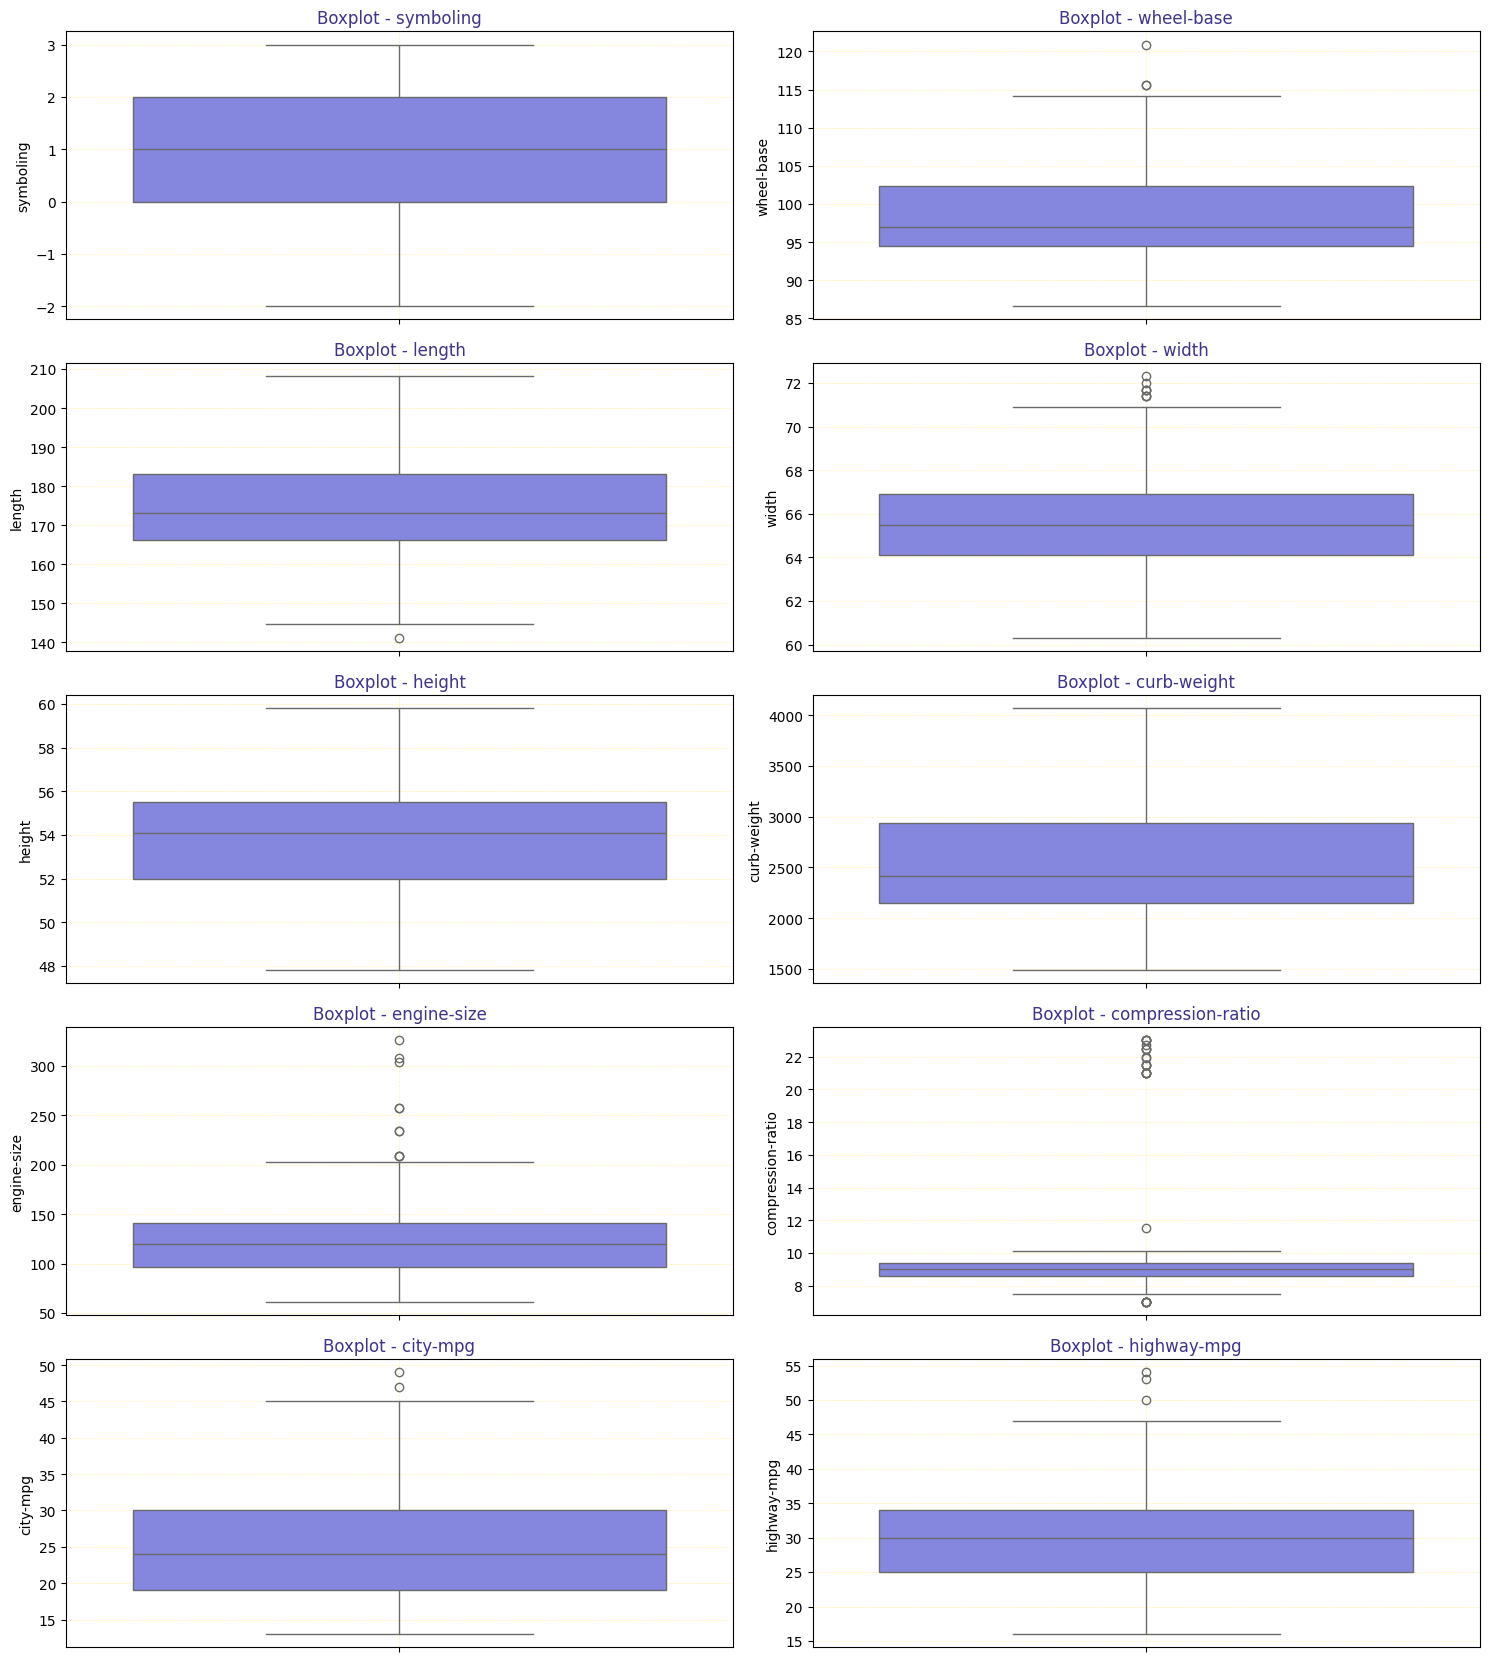


Matriz de correlación entre variables numéricas:

                   symboling  wheel-base    length     width    height  \
symboling           1.000000   -0.531954 -0.357612 -0.232919 -0.541038   
wheel-base         -0.531954    1.000000  0.874587  0.795144  0.589435   
length             -0.357612    0.874587  1.000000  0.841118  0.491029   
width              -0.232919    0.795144  0.841118  1.000000  0.279210   
height             -0.541038    0.589435  0.491029  0.279210  1.000000   
curb-weight        -0.227691    0.776386  0.877728  0.867032  0.295572   
engine-size        -0.105790    0.569329  0.683360  0.735433  0.067149   
compression-ratio  -0.178515    0.249786  0.158414  0.181129  0.261214   
city-mpg           -0.035823   -0.470414 -0.670909 -0.642704 -0.048640   
highway-mpg         0.034606   -0.544082 -0.704662 -0.677218 -0.107358   

                   curb-weight  engine-size  compression-ratio  city-mpg  \
symboling            -0.227691    -0.105790          -0.17

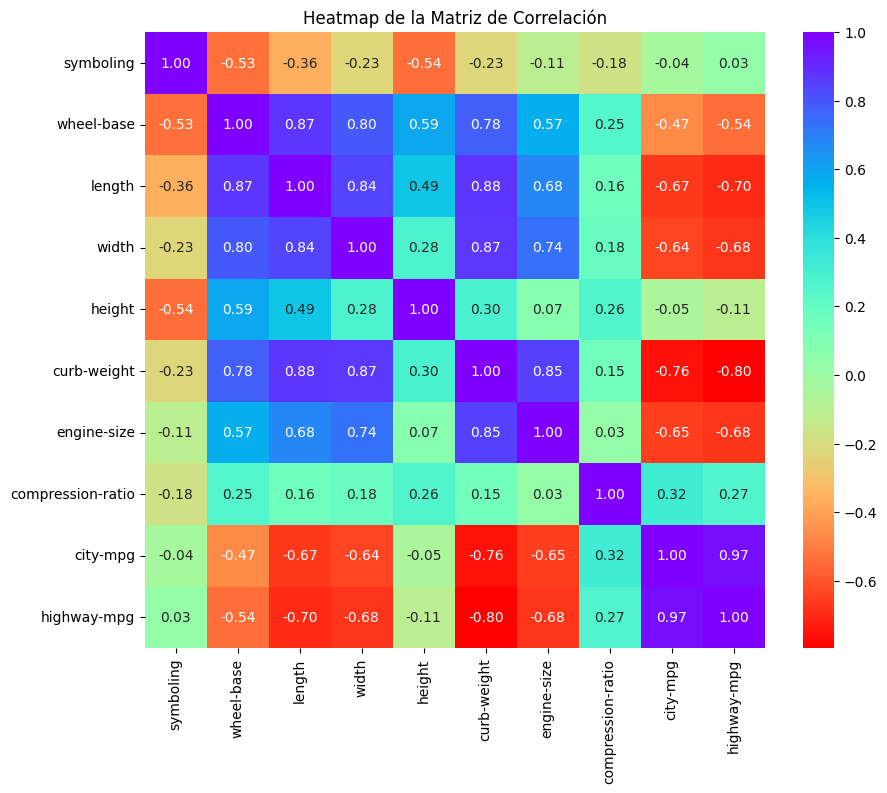

In [68]:
# Importar pandas y librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
file_path = r'C:\Users\Andy\Documents\CodingDojo\Módulo_2_ML\Tareas_ML\Data_Tareas_ML\automobile-data.csv'
auto_data = pd.read_csv(file_path)

# 1. Carga y exploración del dataset

# Mostrar las primeras 10 filas
print("Primeras 10 filas del DataFrame:\n")
print(auto_data.head(10))

# Reemplazar "?" por NaN
auto_data.replace("?", pd.NA, inplace=True)

# Contar valores faltantes por columna
print("\nCantidad de valores faltantes por columna:\n")
print(auto_data.isnull().sum())

# Contar valores únicos por columna
print("\nCantidad de valores únicos por columna:\n")
print(auto_data.nunique())

# Información general del DataFrame
print("\nInformación general del DataFrame:\n")
auto_data.info()

# Descripción de las variables numéricas
print("\nDescripción estadística de las columnas numéricas:\n")
numeric_data = auto_data.select_dtypes(include=["float64", "int64"])
print(numeric_data.describe())

# Tratamiento de valores nulos
auto_data.fillna(auto_data.median(numeric_only=True), inplace=True)

# Imputar valores faltantes en columnas numéricas con la mediana
for col in auto_data.columns:
    if auto_data[col].dtype in ['float64', 'int64']:
        auto_data[col] = auto_data[col].fillna(auto_data[col].median(numeric_only=True))

# Imputar valores faltantes en columnas categóricas con la categoría "NA"
for col in auto_data.columns:
    if auto_data[col].dtype == 'object' or auto_data[col].dtype.name == 'category':
        auto_data[col] = auto_data[col].fillna('NA')

# Confirmar que los valores "NA" fueron asignados correctamente
print("\nConteo de valores únicos después de imputar con 'NA':\n")
print(auto_data.nunique())

# Identificación y tratamiento de outliers
# Listar las columnas numéricas para graficar boxplots
numeric_columns = numeric_data.columns

# Crear boxplots para cada columna numérica
plt.figure(figsize=(15, 20))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 2 + 1, 2, i)
    sns.boxplot(data=auto_data, y=column, color="#7678ed")
    plt.title(f"Boxplot - {column}", fontsize=12, color="#3d348b") 
    plt.ylabel(column, fontsize=10)
    plt.grid(color='#fff3b0', linestyle='--', linewidth=0.7)

# Ajustar la distribución de los subgráficos
plt.tight_layout()
plt.show()

# Análisis de correlación entre variables
print("\nMatriz de correlación entre variables numéricas:\n")
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

# Graficar la matriz de correlación como un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="rainbow_r", cbar=True)
plt.title("Heatmap de la Matriz de Correlación")
plt.show()


Tipos de datos actualizados:

symboling                   int64
normalized-losses         float64
make                     category
fuel-type                category
aspiration               category
num-of-doors             category
body-style               category
drive-wheels             category
engine-location          category
wheel-base                float64
length                    float64
width                     float64
height                    float64
curb-weight                 int64
engine-type              category
num-of-cylinders         category
engine-size                 int64
fuel-system              category
bore                      float64
stroke                    float64
compression-ratio         float64
horsepower                float64
peak-rpm                  float64
city-mpg                    int64
highway-mpg                 int64
price                     float64
power_to_weight_ratio     float64
engine_size_to_weight     float64
dtype: object

Co

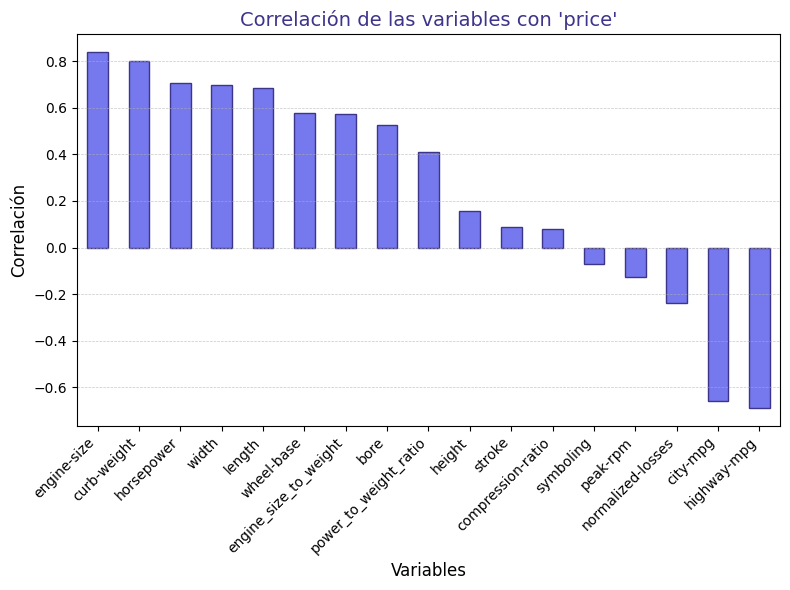

In [65]:
# Diccionario con los tipos de datos para cada columna
data_types = {
    'symboling': 'int64',
    'normalized-losses': 'float64',  # Convierte '?' a NaN si es necesario
    'make': 'category',
    'fuel-type': 'category',
    'aspiration': 'category',
    'num-of-doors': 'category',
    'body-style': 'category',
    'drive-wheels': 'category',
    'engine-location': 'category',
    'wheel-base': 'float64',
    'length': 'float64',
    'width': 'float64',
    'height': 'float64',
    'curb-weight': 'int64',
    'engine-type': 'category',
    'num-of-cylinders': 'category',
    'engine-size': 'int64',
    'fuel-system': 'category',
    'bore': 'float64',
    'stroke': 'float64',
    'compression-ratio': 'float64',
    'horsepower': 'float64',
    'peak-rpm': 'float64',
    'city-mpg': 'int64',
    'highway-mpg': 'int64',
    'price': 'float64'  # Asegúrate de manejar valores nulos si hay precios faltantes
}

# Aplicar los tipos de datos al DataFrame
for column, dtype in data_types.items():
    # Convierte cada columna al tipo especificado
    auto_data[column] = pd.to_numeric(auto_data[column], errors='coerce') if dtype in ['float64', 'int64'] else auto_data[column].astype(dtype)

# Verificar los nuevos tipos de datos
print("\nTipos de datos actualizados:\n")
print(auto_data.dtypes)

# Verificar y convertir la columna 'price' a numérica
if 'price' in auto_data.columns:
    auto_data['price'] = pd.to_numeric(auto_data['price'], errors='coerce')

# Seleccionar las columnas numéricas
numeric_data = auto_data.select_dtypes(include=["float64", "int64"])

# Calcular las correlaciones con 'price' y ordenarlas
if 'price' in numeric_data.columns:
    print("\nCorrelaciones de las variables numéricas con 'price':\n")
    price_correlations = numeric_data.corr(numeric_only=True)['price'].sort_values(ascending=False)
    print(price_correlations)

    # Visualizar las correlaciones de forma gráfica
    plt.figure(figsize=(8, 6))
    price_correlations.drop('price').plot(kind='bar', color="#7678ed", edgecolor='#3d348b')
    plt.title("Correlación de las variables con 'price'", fontsize=14, color="#3d348b")
    plt.xlabel("Variables", fontsize=12)
    plt.ylabel("Correlación", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()
else:
    print("La columna 'price' no está presente en las columnas numéricas.")

### **Parte 2: Preparación de datos**

In [55]:
# 2. Preprocesamiento

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Seleccionar características importantes
important_features = ['curb-weight', 'engine-size', 'horsepower', 'width', 'make', 'fuel-type']
target = 'price'

# Validar que las columnas seleccionadas existen en el DataFrame
existing_features = [col for col in important_features if col in auto_data.columns]
missing_features = set(important_features) - set(existing_features)
if missing_features:
    print(f"Advertencia: Las siguientes columnas no se encontraron en el DataFrame: {missing_features}")

# Transformar las columnas categóricas seleccionadas en variables dummies
categorical_features = [col for col in ['make', 'fuel-type'] if col in existing_features]
df_final = pd.get_dummies(auto_data[existing_features], columns=categorical_features, drop_first=True) if categorical_features else auto_data[existing_features]

# Confirmar transformación de datos
print(f"\nOne-Hot Encoding aplicado a las columnas categóricas: {categorical_features}")
print("\nConjunto de datos después de la transformación y selección de características:\n")
print(df_final.head())

# Selección de X (características) y y (objetivo)
X = df_final.copy()  # Copia explícita de las características procesadas
y = pd.to_numeric(auto_data[target], errors='coerce')  # Convertir el target a numérico

# Verificar si hay valores nulos en X o y
print("Valores nulos en X antes del procesamiento:", X.isnull().sum().sum())
print("Valores nulos en y antes del procesamiento:", y.isnull().sum())

# Si hay valores nulos, eliminarlos
if X.isnull().sum().sum() > 0 or y.isnull().sum() > 0:
    print("Se encontraron valores nulos. Procediendo a eliminarlos...")
    X = X.loc[~y.isna()].dropna()  # Eliminar filas con NaN en X y sincronizar índices con y
    y = y.loc[X.index]  # Asegurarse de que y esté alineado con X después de la limpieza
else:
    print("No se encontraron valores nulos en X o y.")

# Confirmar que no hay valores nulos después del procesamiento
print("Valores nulos en X después del procesamiento:", X.isnull().sum().sum())
print("Valores nulos en y después del procesamiento:", y.isnull().sum())

# División del conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirmar cambios
print("\nConjunto de datos preprocesado correctamente.\n")
print("Características seleccionadas:\n", list(X.columns))
print("Ejemplo de datos escalados:\n", X_train_scaled[:5])


One-Hot Encoding aplicado a las columnas categóricas: ['make', 'fuel-type']

Conjunto de datos después de la transformación y selección de características:

   curb-weight  engine-size  horsepower  width  make_audi  make_bmw  \
0         2548          130       111.0   64.1      False     False   
1         2548          130       111.0   64.1      False     False   
2         2823          152       154.0   65.5      False     False   
3         2337          109       102.0   66.2       True     False   
4         2824          136       115.0   66.4       True     False   

   make_chevrolet  make_dodge  make_honda  make_isuzu  ...  make_peugot  \
0           False       False       False       False  ...        False   
1           False       False       False       False  ...        False   
2           False       False       False       False  ...        False   
3           False       False       False       False  ...        False   
4           False       False       Fals

### **Parte 3: Modelos de Regresión**

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Resultados de evaluación para cada modelo
results = {}

# 3. Regresión Lineal
print("\n--- Regresión Lineal ---")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)  # Entrenamiento del modelo
y_pred_lr = lr_model.predict(X_test_scaled)  # Predicción

# Evaluación del modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
results['Regresión Lineal'] = {'MSE': mse_lr, 'R²': r2_lr}

print(f"MSE (Regresión Lineal): {mse_lr:.2f}")
print(f"R² (Regresión Lineal): {r2_lr:.2f}")

# 4. K-Nearest Neighbors (KNN)
print("\n--- K-Nearest Neighbors (KNN) ---")
knn_model = KNeighborsRegressor(n_neighbors=5)  # Se usan 5 vecinos por defecto
knn_model.fit(X_train_scaled, y_train)  # Entrenamiento del modelo
y_pred_knn = knn_model.predict(X_test_scaled)  # Predicción

# Evaluación del modelo
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
results['KNN'] = {'MSE': mse_knn, 'R²': r2_knn}

print(f"MSE (KNN): {mse_knn:.2f}")
print(f"R² (KNN): {r2_knn:.2f}")

# 5. Árbol de Decisión
print("\n--- Árbol de Decisión ---")
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)  # Entrenamiento del modelo
y_pred_dt = dt_model.predict(X_test_scaled)  # Predicción

# Evaluación del modelo
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
results['Árbol de Decisión'] = {'MSE': mse_dt, 'R²': r2_dt}

print(f"MSE (Árbol de Decisión): {mse_dt:.2f}")
print(f"R² (Árbol de Decisión): {r2_dt:.2f}")

# Mostrar resultados finales
print("\n--- Resumen de Resultados ---")
for model, metrics in results.items():
    print(f"{model}: MSE = {metrics['MSE']:.2f}, R² = {metrics['R²']:.2f}")


--- Regresión Lineal ---
MSE (Regresión Lineal): 8862855.47
R² (Regresión Lineal): 0.92

--- K-Nearest Neighbors (KNN) ---
MSE (KNN): 29938851.50
R² (KNN): 0.74

--- Árbol de Decisión ---
MSE (Árbol de Decisión): 7967961.62
R² (Árbol de Decisión): 0.93

--- Resumen de Resultados ---
Regresión Lineal: MSE = 8862855.47, R² = 0.92
KNN: MSE = 29938851.50, R² = 0.74
Árbol de Decisión: MSE = 7967961.62, R² = 0.93


### **Parte 4: Benchmarking y Comparación de Modelos**


--- Resultados Comparativos de los Modelos ---

              Modelo           MSE        R²
0   Regresión Lineal  8.862855e+06  0.921611
1                KNN  2.993885e+07  0.735201
2  Árbol de Decisión  7.967962e+06  0.929526


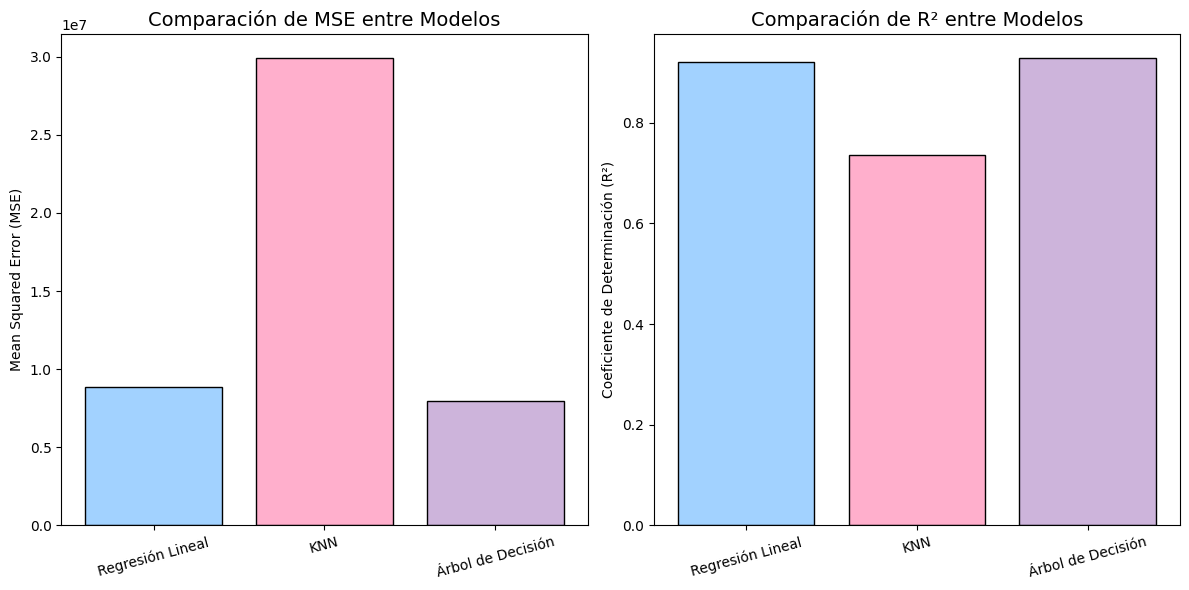


--- Discusión sobre las diferencias en el rendimiento ---

Modelo: Regresión Lineal
- MSE: 8862855.47
- R²: 0.92
  -> Este modelo explica una alta proporción de la varianza en los datos.
  -> Es adecuado para predecir precios de autos en este contexto.

Modelo: KNN
- MSE: 29938851.50
- R²: 0.74
  -> Este modelo tiene un rendimiento moderado, pero podría mejorarse con ajustes.

Modelo: Árbol de Decisión
- MSE: 7967961.62
- R²: 0.93
  -> Este modelo explica una alta proporción de la varianza en los datos.
  -> Es adecuado para predecir precios de autos en este contexto.


--- Interpretación de Resultados ---

El modelo con el mejor desempeño basado en R² es: Árbol de Decisión (R² = 0.93)

--- Posibles Mejoras y Próximos Pasos ---

- Realizar ajustes en los hiperparámetros de los modelos:
  - Para Árbol de Decisión: probar con diferentes valores de 'max_depth' y 'min_samples_split'.
  - Para KNN: probar con diferentes valores de 'n_neighbors'.
- Usar validación cruzada para evaluar la es

In [64]:
# Convertir los resultados en un DataFrame para análisis
results_df = pd.DataFrame(results).T  # Transponer para mostrar modelos como filas
results_df.index.name = "Modelo"
results_df.reset_index(inplace=True)

# Mostrar la tabla comparativa
print("\n--- Resultados Comparativos de los Modelos ---\n")
print(results_df)

# Visualizar los resultados
plt.figure(figsize=(12, 6))

# Gráfico de barras para MSE
plt.subplot(1, 2, 1)
plt.bar(results_df["Modelo"], results_df["MSE"], color=["#a2d2ff", "#ffafcc", "#cdb4db"], edgecolor="black")
plt.title("Comparación de MSE entre Modelos", fontsize=14)
plt.ylabel("Mean Squared Error (MSE)")
plt.xticks(rotation=15)

# Gráfico de barras para R²
plt.subplot(1, 2, 2)
plt.bar(results_df["Modelo"], results_df["R²"], color=["#a2d2ff", "#ffafcc", "#cdb4db"], edgecolor="black")
plt.title("Comparación de R² entre Modelos", fontsize=14)
plt.ylabel("Coeficiente de Determinación (R²)")
plt.xticks(rotation=15)

plt.tight_layout()
plt.show()

# Discusión sobre diferencias en el rendimiento y análisis de resultados
print("\n--- Discusión sobre las diferencias en el rendimiento ---\n")
best_model = None
best_r2 = float('-inf')  # Inicializar con un valor muy bajo para comparar

for index, row in results_df.iterrows():
    print(f"Modelo: {row['Modelo']}")
    print(f"- MSE: {row['MSE']:.2f}")
    print(f"- R²: {row['R²']:.2f}")
    if row["R²"] > best_r2:
        best_model = row['Modelo']
        best_r2 = row["R²"]
    
    # Interpretación del rendimiento
    if row["R²"] > 0.8:
        print(f"  -> Este modelo explica una alta proporción de la varianza en los datos.")
        print(f"  -> Es adecuado para predecir precios de autos en este contexto.\n")
    elif row["R²"] > 0.5:
        print(f"  -> Este modelo tiene un rendimiento moderado, pero podría mejorarse con ajustes.\n")
    else:
        print(f"  -> Este modelo tiene un rendimiento bajo y podría no ser adecuado.\n")

# Interpretación de los resultados generales
print("\n--- Interpretación de Resultados ---\n")
print(f"El modelo con el mejor desempeño basado en R² es: {best_model} (R² = {best_r2:.2f})")

# Posibles mejoras y próximos pasos
print("\n--- Posibles Mejoras y Próximos Pasos ---\n")
print("- Realizar ajustes en los hiperparámetros de los modelos:")
print("  - Para Árbol de Decisión: probar con diferentes valores de 'max_depth' y 'min_samples_split'.")
print("  - Para KNN: probar con diferentes valores de 'n_neighbors'.")
print("- Usar validación cruzada para evaluar la estabilidad y consistencia de los resultados.")
print("- Considerar técnicas avanzadas como:")
print("  - Random Forest o Gradient Boosting para mejorar el rendimiento de los Árboles de Decisión.")
print("  - Reducción de dimensionalidad (PCA) si hay muchas variables independientes.")
print("- Analizar la importancia de las características para identificar las más relevantes.")
print("- Aumentar el tamaño del conjunto de datos (si es posible) para mejorar la generalización del modelo.")

### **Desafíos Adicionales**

In [63]:
from sklearn.model_selection import GridSearchCV, cross_val_score

# 1. Optimización de Modelos con GridSearchCV

# Verificar valores en X_train_scaled y y_train antes de GridSearch
print("Valores nulos en X_train_scaled antes de GridSearch:", np.isnan(X_train_scaled).sum())
print("Valores infinitos en X_train_scaled antes de GridSearch:", np.isinf(X_train_scaled).sum())
print("Valores nulos en y_train antes de GridSearch:", np.isnan(y_train).sum())
print("Valores infinitos en y_train antes de GridSearch:", np.isinf(y_train).sum())

# Limpiar valores no válidos si los hay
if np.isnan(X_train_scaled).sum() > 0 or np.isinf(X_train_scaled).sum() > 0:
    valid_rows = ~np.isnan(X_train_scaled).any(axis=1) & ~np.isinf(X_train_scaled).any(axis=1)
    X_train_scaled = X_train_scaled[valid_rows]
    y_train = y_train.iloc[valid_rows]

if np.isnan(y_train).sum() > 0 or np.isinf(y_train).sum() > 0:
    y_train = y_train[~np.isnan(y_train) & ~np.isinf(y_train)]

# Confirmar valores después de la limpieza
print("Valores nulos en X_train_scaled después de limpieza:", np.isnan(X_train_scaled).sum())
print("Valores infinitos en X_train_scaled después de limpieza:", np.isinf(X_train_scaled).sum())
print("Valores nulos en y_train después de limpieza:", np.isnan(y_train).sum())
print("Valores infinitos en y_train después de limpieza:", np.isinf(y_train).sum())

# Parámetros ajustados para evitar overfitting en KNN
knn_params = {
    'n_neighbors': [5, 7, 9, 11],  # Valores conservadores para evitar alta complejidad
    'weights': ['uniform', 'distance'],  # 'distance' pondera según la distancia, lo que reduce el impacto de puntos lejanos
    'metric': ['euclidean', 'manhattan']
}

# GridSearch para KNN
print("\n--- Optimización de KNN con GridSearchCV ---")
knn_grid = GridSearchCV(KNeighborsRegressor(), knn_params, cv=5, scoring='r2', verbose=1, n_jobs=-1)
knn_grid.fit(X_train_scaled, y_train)
print(f"Mejores parámetros para KNN: {knn_grid.best_params_}")
print(f"Mejor puntuación R² para KNN: {knn_grid.best_score_:.2f}")

# Parámetros ajustados para evitar overfitting en Árbol de Decisión
dt_params = {
    'max_depth': [5, 10, 15],  # Limitar la profundidad del árbol para evitar sobreajuste
    'min_samples_split': [5, 10],  # Aumentar el mínimo de muestras para dividir un nodo
    'min_samples_leaf': [2, 5]  # Requiere un número mínimo de muestras en cada hoja
}

# GridSearch para Árbol de Decisión
print("\n--- Optimización de Árbol de Decisión con GridSearchCV ---")
dt_grid = GridSearchCV(DecisionTreeRegressor(random_state=42), dt_params, cv=5, scoring='r2', verbose=1, n_jobs=-1)
dt_grid.fit(X_train_scaled, y_train)
print(f"Mejores parámetros para Árbol de Decisión: {dt_grid.best_params_}")
print(f"Mejor puntuación R² para Árbol de Decisión: {dt_grid.best_score_:.2f}")

# 2. Feature Engineering: Crear nuevas características
print("\n--- Feature Engineering ---")

# Asegurarse de que 'curb-weight' no tiene valores categóricos
if auto_data['curb-weight'].dtype.name == 'category':
    auto_data['curb-weight'] = auto_data['curb-weight'].astype(float)

# Crear las nuevas características manejando divisiones por cero
auto_data['power_to_weight_ratio'] = auto_data['horsepower'] / auto_data['curb-weight'].replace(0, np.nan)
auto_data['engine_size_to_weight'] = auto_data['engine-size'] / auto_data['curb-weight'].replace(0, np.nan)

# Rellenar NaN resultantes de divisiones por cero
auto_data['power_to_weight_ratio'] = auto_data['power_to_weight_ratio'].fillna(0)
auto_data['engine_size_to_weight'] = auto_data['engine_size_to_weight'].fillna(0)

print("Nuevas características creadas: 'power_to_weight_ratio', 'engine_size_to_weight'")

# Verificar las primeras filas con las nuevas características
print("\nEjemplo de datos con nuevas características:")
print(auto_data[['power_to_weight_ratio', 'engine_size_to_weight']].head())


# 3. Validación Cruzada
print("\n--- Validación Cruzada ---")
models = {
    "Regresión Lineal": LinearRegression(),
    "Optimizado KNN": knn_grid.best_estimator_,
    "Optimizado Árbol de Decisión": dt_grid.best_estimator_
}

# Realizar validación cruzada para cada modelo
cv_results = {}
for model_name, model in models.items():
    print(f"\nValidación Cruzada para {model_name}")
    scores = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='r2')  # Aumentar a 10 particiones para estabilidad
    cv_results[model_name] = {
        "R² promedio": np.mean(scores),
        "R² desviación estándar": np.std(scores)
    }
    print(f"R² promedio: {cv_results[model_name]['R² promedio']:.2f}")
    print(f"R² desviación estándar: {cv_results[model_name]['R² desviación estándar']:.2f}")

# Mostrar resultados de la validación cruzada
print("\n--- Resultados de Validación Cruzada ---")
for model, metrics in cv_results.items():
    print(f"{model}: R² promedio = {metrics['R² promedio']:.2f}, R² desviación estándar = {metrics['R² desviación estándar']:.2f}")


Valores nulos en X_train_scaled antes de GridSearch: 0
Valores infinitos en X_train_scaled antes de GridSearch: 0
Valores nulos en y_train antes de GridSearch: 0
Valores infinitos en y_train antes de GridSearch: 0
Valores nulos en X_train_scaled después de limpieza: 0
Valores infinitos en X_train_scaled después de limpieza: 0
Valores nulos en y_train después de limpieza: 0
Valores infinitos en y_train después de limpieza: 0

--- Optimización de KNN con GridSearchCV ---
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Mejores parámetros para KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Mejor puntuación R² para KNN: 0.81

--- Optimización de Árbol de Decisión con GridSearchCV ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mejores parámetros para Árbol de Decisión: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}
Mejor puntuación R² para Árbol de Decisión: 0.82

--- Feature Engineering ---
Nuevas características creada